
# Análisis frecuencial y diseño de filtros fir pasabanda
Ignacio Díaz Blanco 2019, Universidad de Oviedo. 

## Descripcion 
En este script de Matlab se cargan los datos de diversos ensayos realizados 
sobre un motor asíncrono de 4 kW. Se analizan las variables $a_x(t)$, $a_y(t)$ de 
acelerómetros colocados en direcciones $x$ e $y$ del motor. Se describen los siguientes 
procedimientos: 

* Análisis frecuencial de las señales mediante FFT
* Diseño de un filtro FIR pasabanda en la zona de frecuencias de los cojinetes
* Trazado de la respuesta en frecuencia del filtro FIR diseñado
* Filtrado de las señales mediante el filtro FIR
* Análisis frecuencial de la señal filtrada mediante FFT



In [1]:
# compatibilidad con Python 3
from __future__ import division
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from scipy.io.matlab import loadmat

%matplotlib inline

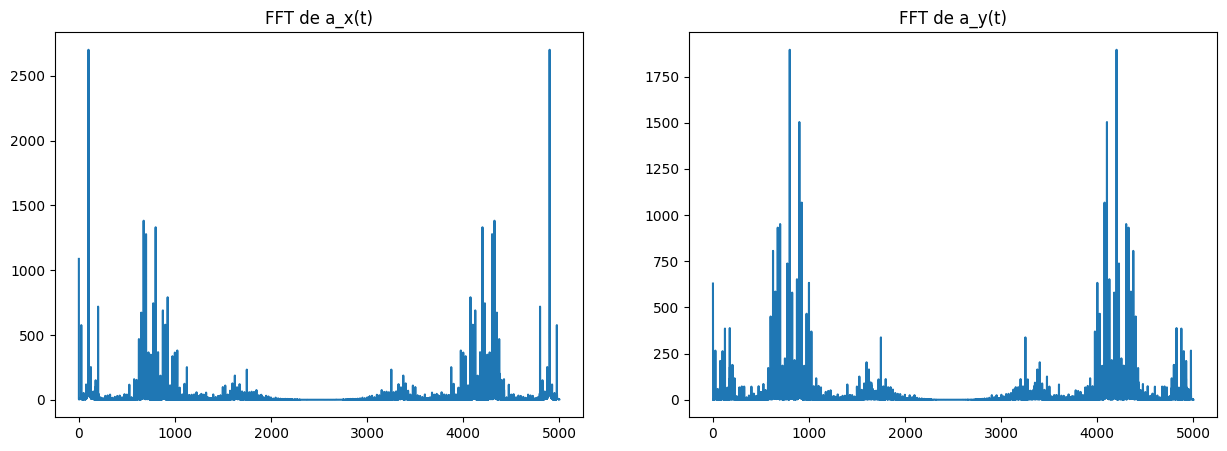

In [2]:
datos = loadmat('../../datos/dataicann.mat')
etiq_ensayos = datos['nom'][0][0][0]

# cargamos nombres de las variables
varNames = []
for i in range(5):
    varNames.append(datos['NombresVariables'][0][i][0])
    
# cargamos los datos de los ensayos
z = []
nom = []
for i in range(9):
    z.append(datos['z'][:,i][0]) 
    nom.append(datos['nom'][0][i][0])


# SELECCION DE UNO DE LOS REGISTROS PARA SU ANALISIS (EJ. FALLO ASIMETRIA)
Registro = 1;
ac = z[Registro][:,0]; 
ax = z[Registro][:,1]; 
ay = z[Registro][:,2];


# PARAMETROS VARIOS
N = len(ac);                # Tamaño de la secuencia de datos
fm = 5000;                  # Frecuencia de muestreo
tm = 1/fm;                  # Periodo de muestreo
f = np.arange(0,fm,fm/N);   # Vector de frecuencias ...
t = np.arange(0,tm*N,tm);   # Vector de tiempos

# ANALISIS MEDIANTE TRANSFORMADA DE FOURIER (FFT)
# Acelerometro a_x(t)
plt.figure(1,figsize=(15,5)); 
plt.subplot(1,2,1)
# soundsc(ax,5000);
plt.plot(f,abs(np.fft.fft(ax)));     
plt.title('FFT de a_x(t)');

# Acelerometro a_y(t)
plt.subplot(1,2,2)
#soundsc(ay,5000);
plt.plot(f,abs(np.fft.fft(ay)));     
plt.title('FFT de a_y(t)');

(np.float64(1000.0),
 np.float64(2500.0),
 np.float64(-94.74952996696099),
 np.float64(500.0))

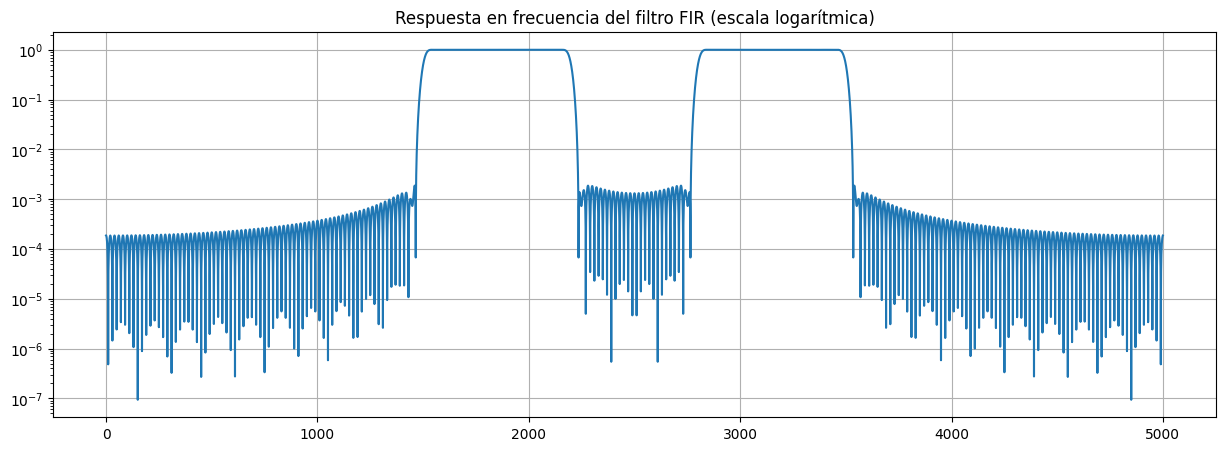

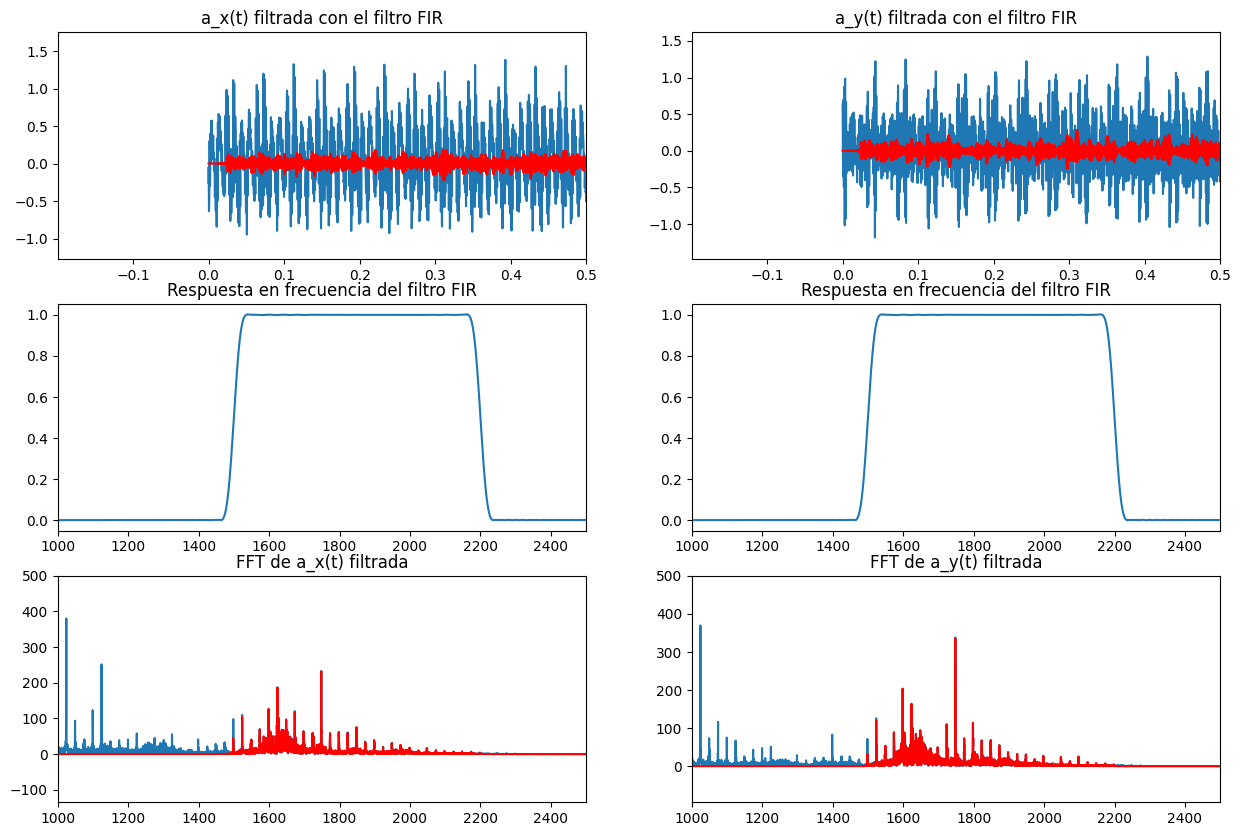

In [3]:
# DISEÑO DE UN FILTRO FIR PASABAJOS
# Obtencion de coeficientes del filtro 
wc1 = 1500/(fm/2);                              # Frecuencia de corte (normalizada 0=0, 1=frec_shannon)
wc2 = 2200/(fm/2);                              # Frecuencia de corte (normalizada 0=0, 1=frec_shannon)
b = sig.firwin(251,[wc1,wc2],window='hamming',pass_zero=False);     # Coeficientes del fir (defecto: ventana de Hamming)



# Trazado de la respuesta en frecuencia del filtro fir
plt.figure(2,figsize=(15,5)); 
plt.semilogy(f,abs(np.fft.fft(b,N)));  
plt.grid('on')
plt.title(u'Respuesta en frecuencia del filtro FIR (escala logarítmica)');




# FILTRADO DE LAS SEÑALES
axf = sig.lfilter(b,1,ax);
ayf = sig.lfilter(b,1,ay);



plt.figure(3,figsize=(15,10));
plt.subplot(3,2,1)
#soundsc(axf,5000);  # Sonificacion
plt.plot(t,ax)
plt.plot(t,axf,color='r');        # Trazado grafico de la señal filtrada
plt.title('a_x(t) filtrada con el filtro FIR');
plt.axis(xmax=0.5)



plt.subplot(3,2,2); 
plt.plot(t,ay)
plt.plot(t,ayf,color='r');        # Trazado grafico de la señal filtrada
plt.title('a_y(t) filtrada con el filtro FIR');
plt.axis(xmax=0.5)



plt.subplot(3,2,3);
plt.plot(f,abs(np.fft.fft(b,N)));  
plt.title('Respuesta en frecuencia del filtro FIR');
plt.axis(xmin=1000,xmax=2500)


plt.subplot(3,2,4);
plt.plot(f,abs(np.fft.fft(b,N)));  
plt.title('Respuesta en frecuencia del filtro FIR');
plt.axis(xmin=1000,xmax=2500)



# FFT de las señales filtradas
plt.subplot(3,2,5);
plt.plot(f,abs(np.fft.fft(ax)))
plt.plot(f,abs(np.fft.fft(axf)),color='red');
plt.title('FFT de a_x(t) filtrada');
plt.axis(xmin=1000,xmax=2500,ymax=500)



plt.subplot(3,2,6);
plt.plot(f,abs(np.fft.fft(ay)))
plt.plot(f,abs(np.fft.fft(ayf)),color='red');
plt.title('FFT de a_y(t) filtrada');
plt.axis(xmin=1000,xmax=2500,ymax=500)

**Sonificación de la señal de aceleración**. Reproducción en audio de la señal de aceleración (vibraciones) a la misma frecuencia de muestreo a la que se tomó. En sonificación de datos, existen infinidad de posibilidades para obtener información de la señal. Una posibilidad muy sencilla es reproducirla a otras frecuencias de muestreo donde se aprecian otros efectos

In [4]:

#########################################################################
# SONIFICACIÓN DE LA SEÑAL ORIGINAL Y DE LA FILTRADA
#########################################################################


# Importamos PyAudio para reproducir señales como audio
import pyaudio

# --------------------------------------------------
# SONIFICACIÓN DE LA SEÑAL ORIGINAL
# --------------------------------------------------

# Señal de aceleración original (a_x)
chunk = ax

# Inicializamos el sistema de audio
p = pyaudio.PyAudio()

# Abrimos un stream de salida (mono, float32, fs = 5000 Hz)
stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=5000,
                output=True,
                frames_per_buffer=1)

# Reproducimos la señal original
stream.write(chunk.astype(np.float32).tobytes())

# Cerramos el stream y liberamos recursos
stream.close()
p.terminate()

**Sonificación de la señal de aceleración filtrada**. La señal filtrada deja pasar en su mayor parte frecuencias propias de los cojinetes. El sonido es similar al que percibiríamos a si acercásemos el oído justo en ese punto.

In [5]:
# --------------------------------------------------
# SONIFICACIÓN DE LA SEÑAL FILTRADA
# --------------------------------------------------
# La señal filtrada deja pasar mayoritariamente las
# frecuencias asociadas a los cojinetes. El sonido
# resultante es similar al que se percibiría al
# acercar el oído a esa zona del motor.

# Señal de aceleración filtrada
chunk = axf

p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=5000,
                output=True,
                frames_per_buffer=1)

# Reproducimos la señal filtrada
stream.write(chunk.astype(np.float32).tobytes())

# Cerramos el stream y liberamos recursos
stream.close()
p.terminate()


In [7]:
%%html
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">"Analisis frecuencial y diseño de filtros fir pasabanda"</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://isa.uniovi.es/~idiaz" property="cc:attributionName" rel="cc:attributionURL">Ignacio Díaz Blanco</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Reconocimiento-CompartirIgual 4.0 Internacional License</a>.
